<a href="https://colab.research.google.com/github/chelseawmk/Visualization-with-GeoPandas-and-GeoPlot/blob/master/Mapping_US_County_Level_data_with_Geoplot_and_Geopandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mapping US County Level data with Geoplot and Geopandas

## install packages

In [0]:
#pip install kaggle
#pip install geopandas
# !pip install git+git://github.com/geopandas/geopandas.git
# !apt install proj-bin libproj-dev libgeos-dev
# !pip install git+git://github.com/ResidentMario/geoplot.git

In [2]:
import geopandas as gpd
import pandas as pd

import os
from google.colab import (drive,files)

import geoplot as gplt
import geoplot.crs as gcrs
import mapclassify

/usr/local/lib/python3.6/dist-packages/geopandas/sindex.py:26: UserWarning: Spatial indexes require either `rtree` or `pygeos`.
  warn("Spatial indexes require either `rtree` or `pygeos`.")


## import data

In [3]:
drive.mount("/content/drive")
path = "/content/drive/My Drive/Colab Notebooks/data/tl_2017_us_county"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
county=gpd.read_file(path+'/tl_2017_us_county.shp')
CONUS_county=county.query("(STATEFP!='02')&(STATEFP!='15')&(STATEFP!='60')&(STATEFP!='66')&(STATEFP!='69')&(STATEFP!='72')&(STATEFP!='78')")
county=pd.read_csv(path+'/counties.csv')

In [0]:
CONUS_county['GEOID']=CONUS_county['GEOID'].astype('int64')
CONUS_county=CONUS_county.set_index('GEOID')

In [0]:
county_data=pd.merge(CONUS_county,county,how='inner',left_index=True, right_on='FIPS')

# Visualize Unemployment Rate by US County in year 2018

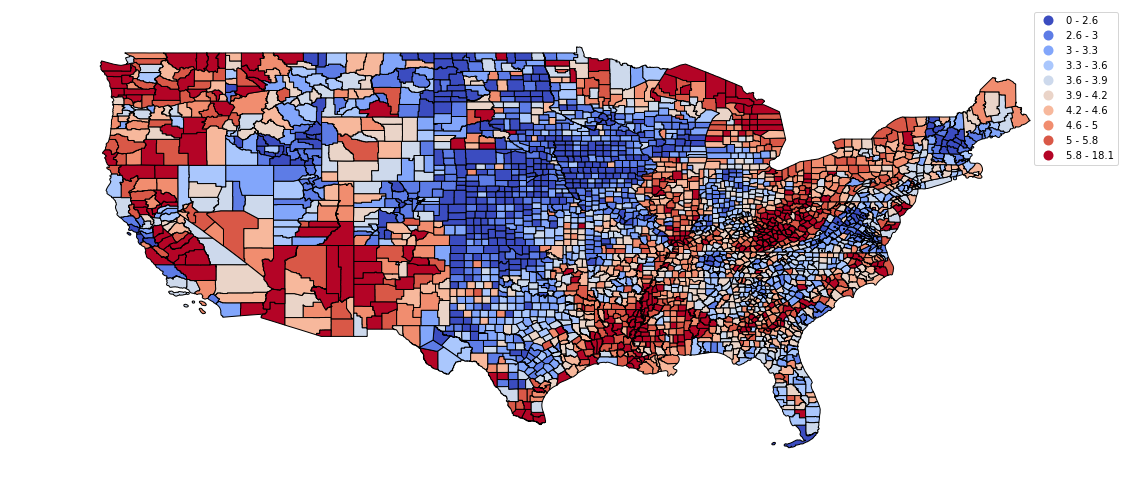

In [7]:
#map Unemployment Rate
scheme = mapclassify.Quantiles(county_data['Unemployment_rate_2018'], k=10)
gplt.choropleth(
    county_data, hue=county_data['Unemployment_rate_2018'], scheme=scheme,
    cmap='coolwarm', figsize=(20, 15),legend=True
)


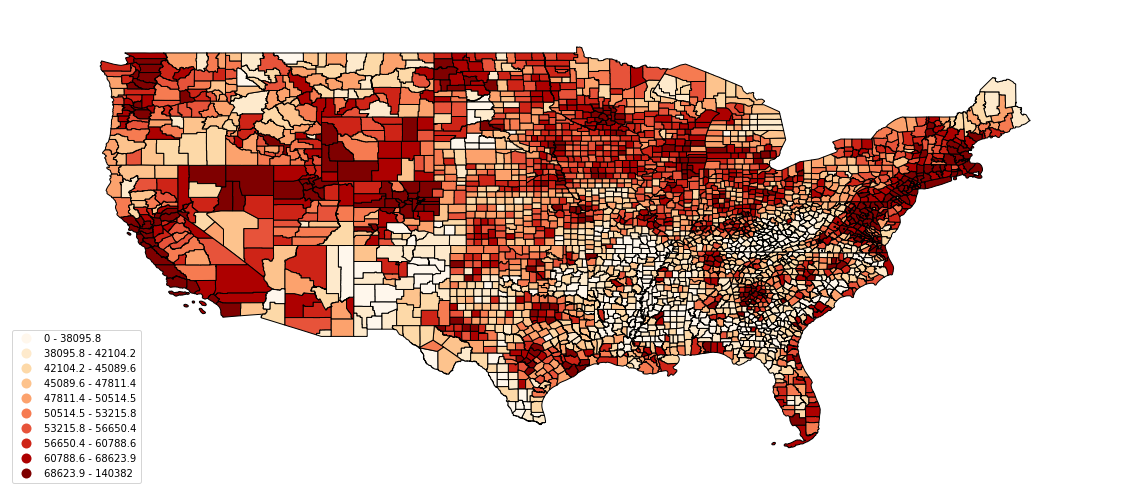

In [8]:
#map Median Household Income by County in year 2018
scheme = mapclassify.Quantiles(county_data['Median_Household_Income_2018'], k=10)
gplt.choropleth(
    county_data, hue=county_data['Median_Household_Income_2018'], scheme=scheme,
    cmap='OrRd', figsize=(20, 15),legend=True
)

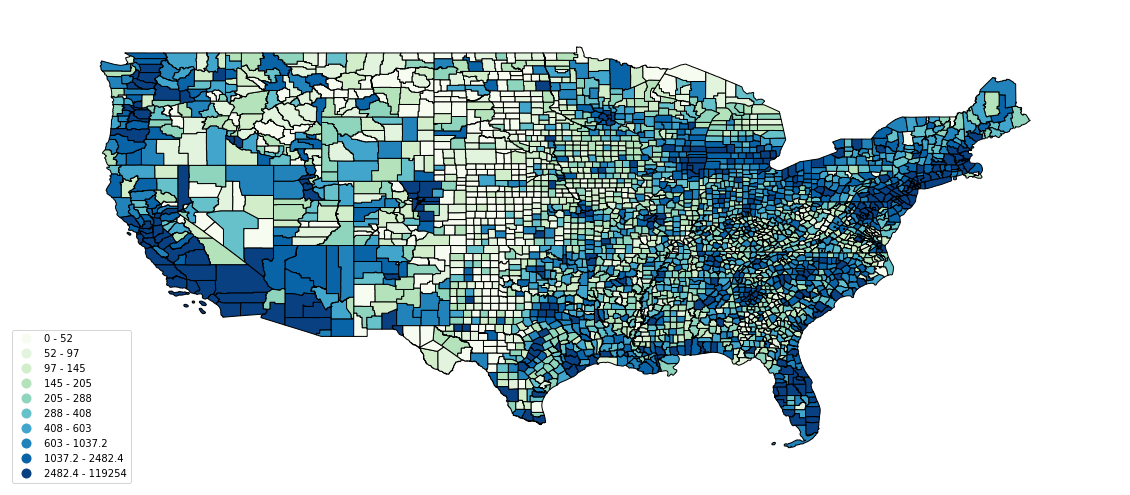

In [9]:
#map Birth by County in year 2018
scheme = mapclassify.Quantiles(county_data['Births_2018'], k=10)
gplt.choropleth(
    county_data, hue=county_data['Births_2018'], scheme=scheme,
    cmap='GnBu', figsize=(20, 15),legend=True
)